In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
a=pd.read_excel("/home/mani/Downloads/July-2018/SalesShamp.xlsx")

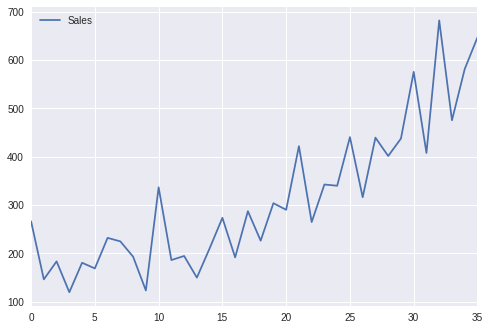

In [3]:
series=a
series.plot()
plt.show()

In [4]:
series.set_index('Month', inplace=True)

In [5]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


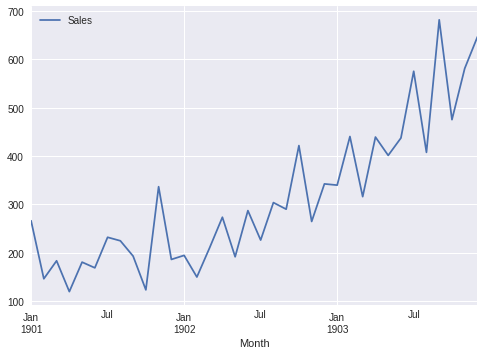

In [6]:
series.plot()
plt.show()

/home/mani/Anaconda1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


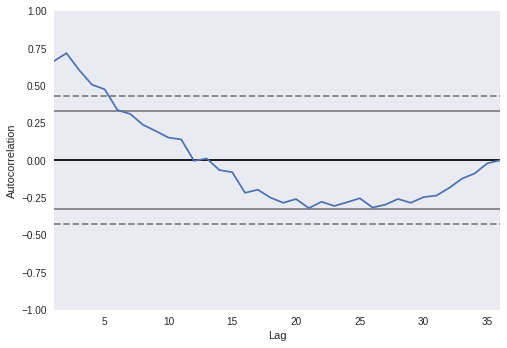

In [7]:
autocorrelation_plot(series)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 27 Jul 2018   AIC                            406.340
Time:                        11:27:57   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

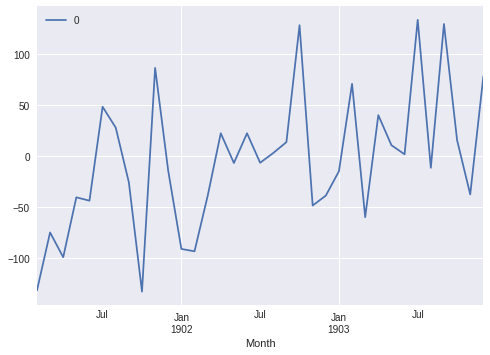

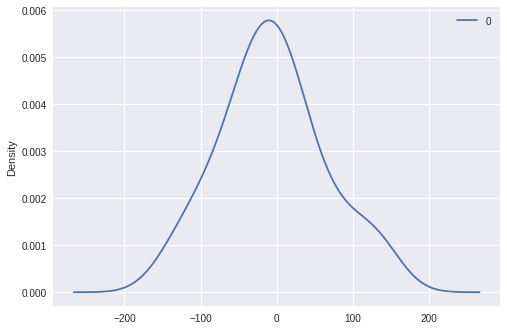

                0
count   35.000000
mean    -5.495300
std     68.132877
min   -133.296683
25%    -42.478011
50%     -7.186713
75%     24.748252
max    133.237890


In [8]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Predictions

In [77]:
x=series.values
#66% train 33%test
size=int(len(x)*0.66)
train,test=x[:size],x[size:]
mse=[]

predicted=349.117703, expected=342.300000
predicted=306.512972, expected=339.700000
predicted=387.376420, expected=440.400000
predicted=348.154191, expected=315.900000
predicted=386.308809, expected=439.300000
predicted=356.082044, expected=401.300000
predicted=446.379447, expected=437.400000
predicted=394.737266, expected=575.500000
predicted=434.915539, expected=407.600000
predicted=507.923424, expected=682.000000
predicted=435.482889, expected=475.300000
predicted=652.743781, expected=581.300000
predicted=546.343507, expected=646.900000
Test MSE: 6958.326


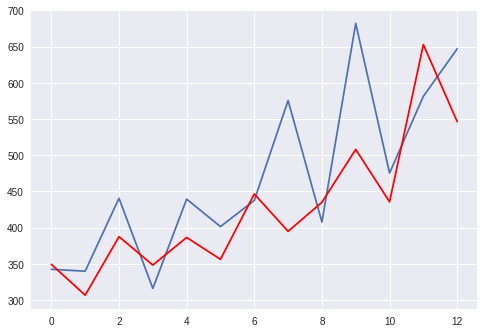

In [81]:
#for f in range(13):
history=[x for x in train]
predictions=[]
for t in range(len(test)):
        model=ARIMA(history, order=(5,1,0))
        model_fit=model.fit(disp=0)
        output=model_fit.forecast()
        yhat=output[0]
    #print(output)
        predictions.append(yhat)
        obs=test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
mse.append(error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [79]:
mse

[18003.17302996237,
 7121.3737127770664,
 5689.9289723036427,
 6998.9464216129954,
 6649.5937360504458,
 6958.325895316163,
 6810.0732434554939,
 6523.8462987864586,
 6579.48430532363]

In [70]:
history=[x for x in train]
predictions=[]
ma={}
for t in range(len(test)):
    model=ARIMA(history, order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast(steps=13-t)
    #yhat=output[0]
    #print(len(output[0]))
    l=[]
    for x in test[:t]:
            l.append(x[0])
    for i in list(output[0]):
            l.append(i)
    ma[str(t)]=l
    #predictions.append(yhat)
    #obs=test[t]
    history.append(test[t])
    #print('predicted=%f, expected=%f' % (yhat, obs))
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
#plt.plot(test)
#plt.plot(predictions, color='red')
#plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [62]:
ma

{'0': [349.11770272157321,
  306.64813160993276,
  390.59828396307938,
  340.58689769349047,
  373.8882524661604,
  350.01071329954425,
  391.07440700915521,
  379.18258433731074,
  399.45883561079853,
  390.05898286709214,
  410.04728837456543,
  409.94846835538249,
  424.34262571211246],
 '1': [342.30000000000001,
  306.51297226705822,
  388.62978921539911,
  340.96915537831899,
  369.98085140113699,
  347.95440385222668,
  388.35517696012658,
  378.2976483776207,
  396.81339407517811,
  387.7633718267723,
  407.08347964415543,
  407.97034465453572,
  421.81035058290576],
 '10': [342.30000000000001,
  339.69999999999999,
  440.39999999999998,
  315.89999999999998,
  439.30000000000001,
  401.30000000000001,
  437.39999999999998,
  575.5,
  407.60000000000002,
  682.0,
  435.48288901951258,
  658.84403885690813,
  502.51915323214166],
 '11': [342.30000000000001,
  339.69999999999999,
  440.39999999999998,
  315.89999999999998,
  439.30000000000001,
  401.30000000000001,
  437.39999999

In [63]:
ma['test']=[x[0] for x in test]

In [64]:
b=pd.DataFrame(ma)

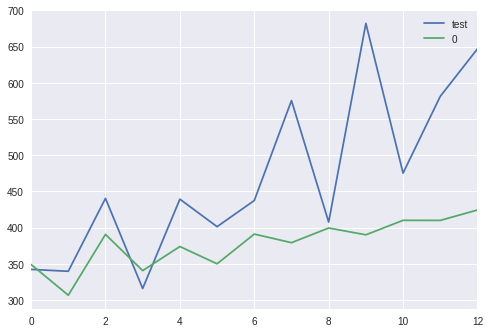

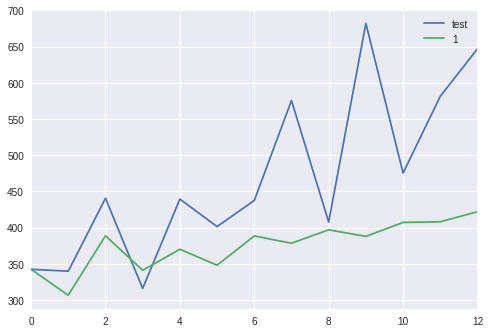

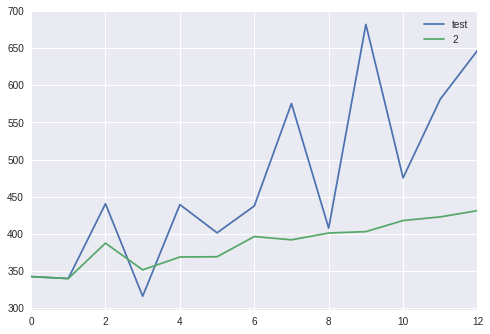

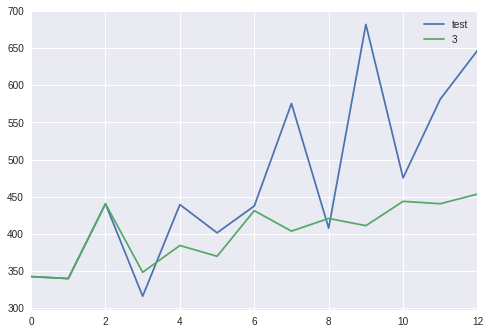

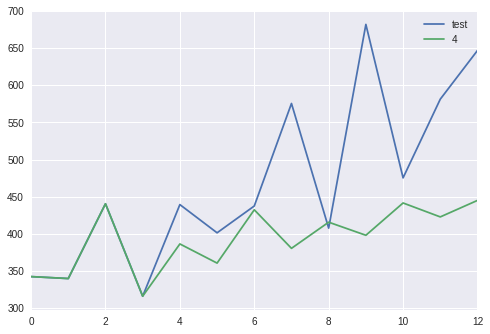

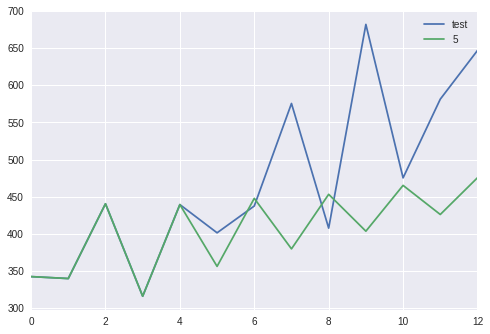

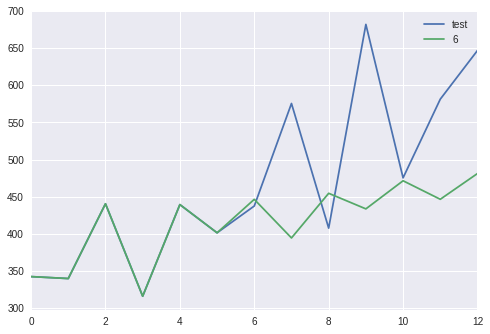

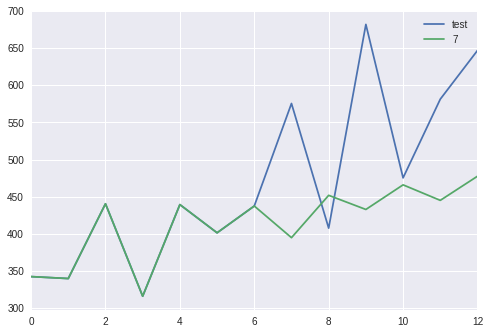

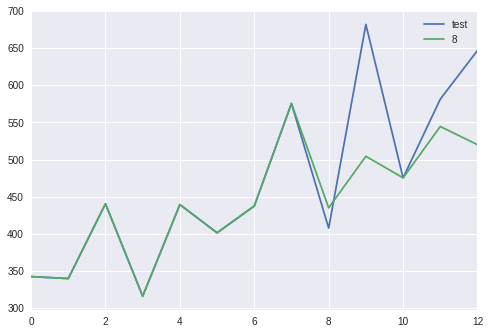

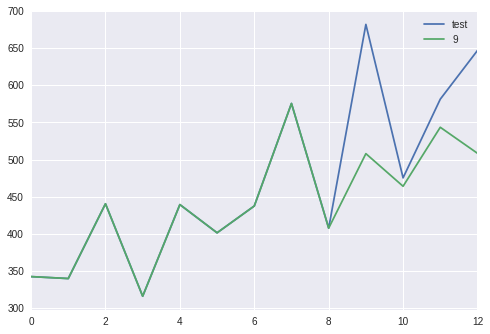

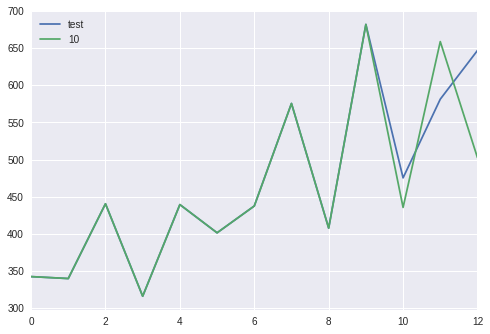

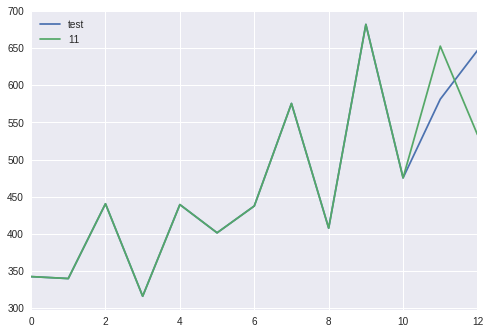

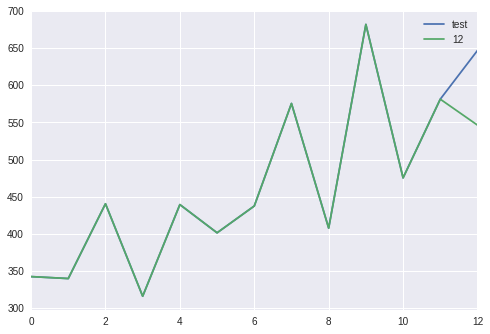

In [69]:
for i in range(13):
    b[['test',str(i)]].plot()

In [44]:
x[0]

342.30000000000001